### Aula 16 : Extração de características

##### Nesse exercício irei utilizar o tamanho para obter a posição das moedas e seus recpectivos valores 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

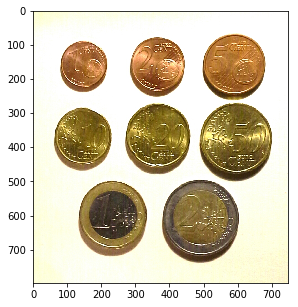

In [2]:
img = cv2.imread('moedas.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (5,5))
plt.imshow(img)

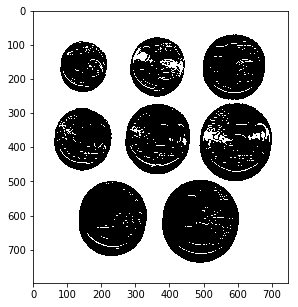

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray,128,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize = (5,5))
plt.imshow(thresh,cmap = 'gray')

In [5]:
components = cv2.connectedComponents(thresh)
components = components[1]

In [6]:
#Atribuiu ao fundo o valor 0 e aos demais o valor 255
for i in range (components.shape[0]):
    for j in range (components.shape[1]):
        if components[i][j] == 1 :
            components[i][j] = 0
        else:
            components[i][j] = 255
components = components.astype('uint8')

In [7]:
kernel = np.ones((3,3))

In [8]:
#Retirar ruídos muito pequenos
components = cv2.morphologyEx(components,cv2.MORPH_OPEN,kernel,iterations = 2)

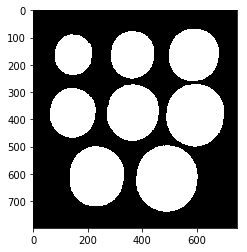

In [9]:
plt.imshow(components,cmap = 'gray')

In [10]:
centroids = cv2.connectedComponentsWithStats(components)

In [11]:
#Número de pontos de cada Componente sendo o 1o o fundo
centroids[2]

array([[     0,      0,    748,    798, 356777],
       [   498,     68,    184,    193,  28360],
       [   285,     77,    160,    174,  22174],
       [    80,     88,    138,    150,  16281],
       [   489,    271,    213,    229,  38745],
       [   271,    272,    191,    206,  31376],
       [    63,    285,    167,    183,  24353],
       [   378,    496,    226,    242,  43561],
       [   134,    499,    200,    220,  35277]], dtype=int32)

In [12]:
#Centros de massa (x,y)
centroids[3]

array([[359.12999717, 400.36336703],
       [589.27066291, 163.7596615 ],
       [364.5169117 , 163.25651664],
       [147.71181131, 163.11276949],
       [594.36902826, 384.27910698],
       [365.71886155, 374.68514151],
       [145.3269823 , 375.82174681],
       [490.32620922, 616.08746356],
       [232.81571562, 608.64308189]])

##### Obter o vetor de indices 

In [13]:
areaMoedas = centroids[2][:][:,4]

In [14]:
areaMoedas

array([356777,  28360,  22174,  16281,  38745,  31376,  24353,  43561,
        35277], dtype=int32)

In [15]:
#Obtem as areas e seus índices
areaSort = []
for i in range (len(areaMoedas)):
    areaSort.append([i,areaMoedas[i]])

In [16]:
areaSort

[[0, 356777],
 [1, 28360],
 [2, 22174],
 [3, 16281],
 [4, 38745],
 [5, 31376],
 [6, 24353],
 [7, 43561],
 [8, 35277]]

In [17]:
def take_value(key):
    return key[1]

In [18]:
areaSort = sorted(areaSort,key = take_value,reverse = True)

In [19]:
areaSort

[[0, 356777],
 [7, 43561],
 [4, 38745],
 [8, 35277],
 [5, 31376],
 [1, 28360],
 [6, 24353],
 [2, 22174],
 [3, 16281]]

In [20]:
areaSort = np.asarray(areaSort)

In [21]:
index = areaSort[1:][:,0]

In [22]:
index

array([7, 4, 8, 5, 1, 6, 2, 3])

##### Encontrar os contornos

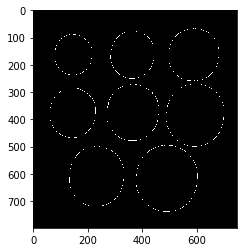

In [23]:
canny = cv2.Canny(components,0,128)
plt.imshow(canny,cmap = 'gray')

In [24]:
contours = cv2.findContours(canny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0]
contours = np.asarray(contours)

In [25]:
contours = [cnt.astype('float32') for cnt in contours ]

In [26]:
contours_sizes= [(cnt,cv2.contourArea(cnt)) for cnt in contours]

In [27]:
allcontours = sorted(contours_sizes,key = take_value,reverse=True)

In [28]:
allcontours = np.asarray(allcontours)

In [29]:
areas = allcontours[:][:,1]
areas

array([43602.0, 38796.5, 35311.0, 31407.0, 28401.0, 24385.5, 22207.5,
       16312.5], dtype=object)

In [30]:
contornos = allcontours[:][:,0]

##### Utilizando os centros de massa encontrar os pontos para desenhar o valor na imagem

In [31]:
centros = centroids[3]
centros

array([[359.12999717, 400.36336703],
       [589.27066291, 163.7596615 ],
       [364.5169117 , 163.25651664],
       [147.71181131, 163.11276949],
       [594.36902826, 384.27910698],
       [365.71886155, 374.68514151],
       [145.3269823 , 375.82174681],
       [490.32620922, 616.08746356],
       [232.81571562, 608.64308189]])

In [32]:
pontos = []

for i in range (len(index)):
    axisx = centros[index[i]][0]
    axisy = centros[index[i]][1]
    area = areas[i]
    r = math.sqrt(area/3.14)
    
    axisx = int(axisx - r//2)
    axisy = int(axisy + r)
    pontos.append([axisx,axisy])

In [33]:
#Pontos em ordem decrescente
pontos 

[[432, 733],
 [539, 495],
 [179, 714],
 [315, 474],
 [542, 258],
 [101, 463],
 [322, 247],
 [111, 235]]

##### Desenha os contonos e os números na imagem

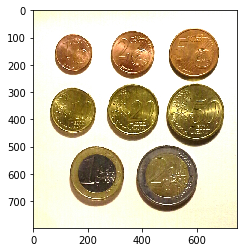

In [34]:
timg = np.copy(img)
plt.imshow(timg)

In [35]:
pontos

[[432, 733],
 [539, 495],
 [179, 714],
 [315, 474],
 [542, 258],
 [101, 463],
 [322, 247],
 [111, 235]]

In [36]:
tamMoedas = ['2 reais','50 cen','1 real', '20 cen', '5 cen', '10 cen' , '2 cen' , '1 cen']

In [37]:
nCon = len(contornos)
font = cv2.FONT_ITALIC

for i in range (nCon):
    contourApply = contornos[i].astype('int64')
    
    cv2.drawContours(timg,contourApply,-1,(0,0,255),10)
    
    cv2.putText(timg,tamMoedas[i],(pontos[i][0],pontos[i][1]), font, 1,(255,0,0),7);

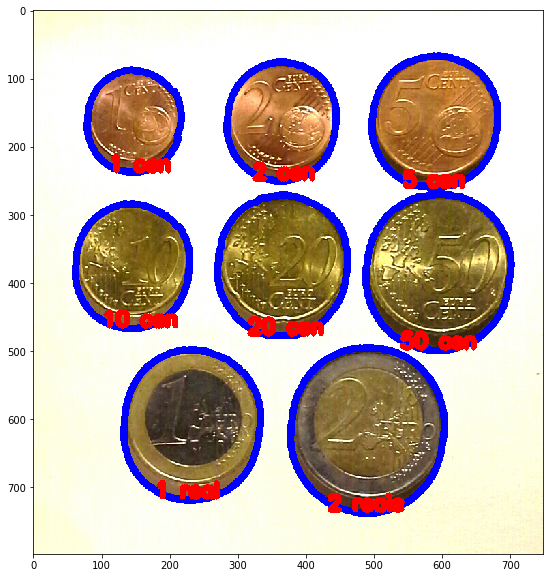

In [38]:
plt.figure(figsize = (10,10))
plt.imshow(timg)